# Bagging & Boosting KNN & Stacking Assignment

1. What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

The fundamental idea of ensemble techniques is to combine multiple individual models (often called base learners or weak learners) to form a single, stronger predictive model.

The intuition: “A group of weak models working together can outperform a single strong model.”

By combining predictions, ensemble methods:
-  Reduce variance (less overfitting)
-  Reduce bias (improve accuracy)
-  Increase robustness (less sensitive to noise or data fluctuations)


Common ensemble methods include:
-  Bagging (Bootstrap Aggregating)
-  Boosting
-  Stacking

2.  Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.


A single decision tree is highly flexible — it can perfectly fit the training data (low bias), but this often causes overfitting (high variance).
It learns not just the patterns, but also the noise in the data.

A Random Forest Classifier, however, combats this overfitting through two main mechanisms:
-  Bagging (Bootstrap Aggregating)
-  Feature Randomness (Random Subspace Method)
-  Together, these introduce diversity among the trees, making the ensemble’s overall prediction more stable and less prone to overfitting.


3.  What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.


Stacking is an ensemble learning technique that combines multiple different models (base learners) by training a meta-model (or “blender”) to learn the best way to combine their outputs.

Instead of just averaging predictions (like in bagging) or sequentially correcting errors (like in boosting), stacking learns from the predictions themselves — essentially using another model to figure out how to blend them optimally.


-  Train base models (Level-0 models):  These can be of different types — e.g., Decision Tree, Logistic Regression, SVM, etc. Each learns patterns from the same training data.
-  Generate meta-features: The predictions from these base models (on a validation set) become new features.
-  Train a meta-model (Level-1 model): A meta-learner (like Logistic Regression or another simple model) is trained on these meta-features to learn how to best combine the base models’ outputs.

4.  What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

When a Random Forest is built using bagging (bootstrap sampling), each tree is trained on a random sample (with replacement) from the original dataset.
On average, each tree uses about 63% of the data for training (because of sampling with replacement).
The remaining ~37% of data is not used to train that particular tree — these are called Out-of-Bag (OOB) samples.
These OOB samples act as a built-in validation set for that tree.


For each training instance:
-  Some trees will have seen it (it was included in their bootstrap sample).
-  Other trees will not have seen it (it’s OOB for those trees).
-  To estimate performance:
-  For each instance, aggregate predictions only from trees that did not train on it.
-  Compare these aggregated predictions to the true label.
-  The resulting accuracy (or other metric) is the OOB Score.

5. Compare AdaBoost and Gradient Boosting in terms of:
- How they handle errors from weak learners
- Weight adjustment mechanism
- Typical use cases


Both AdaBoost and Gradient Boosting are boosting algorithms — they build an ensemble of weak learners (often shallow decision trees) sequentially, where each new model focuses on the errors of the previous ones.

However, they differ in how they handle errors, how they adjust weights, and their flexibility.

6.  Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.


Unlike other boosting frameworks (like XGBoost or LightGBM), CatBoost is designed specifically to handle categorical (non-numeric) data natively, without requiring heavy preprocessing such as one-hot encoding or label encoding.


This is achieved through two key innovations:
Target-Based Encoding (a smart way to convert categories to numbers)
Ordered Boosting (a way to avoid target leakage and overfitting)

Traditional Approach (Problem)

Algorithms like XGBoost require categorical variables to be manually encoded:
-  One-hot encoding → inflates feature space and increases training time.
-  Label encoding → introduces false ordinal relationships.
-  These approaches can lead to poor performance and overfitting, especially when categories are many or unevenly distributed.

7.  KNN Classifier Assignment: Wine Dataset Analysis with Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
    a. Accuracy
    b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [11]:
# ==========================
# 1. Import Required Libraries
# ==========================
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# ==========================
# 2. Load Dataset
# ==========================
wine = load_wine()
X, y = wine.data, wine.target

# ==========================
# 3. Split into Train/Test (70% / 30%)
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ==========================
# 4. Train KNN (K=5) without Scaling
# ==========================
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

# Evaluate
print("🔹 KNN (Unscaled Data, K=5)")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("\nClassification Report:\n", classification_report(y_test, y_pred_default))

# ==========================
# 5. Apply StandardScaler and Retrain
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate
print("\n🔹 KNN (Scaled Data, K=5)")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))

# ==========================
# 6. Hyperparameter Optimization using GridSearchCV
# ==========================
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

# Best Parameters
print("\n🔹 Best Parameters from GridSearchCV:")
print(grid.best_params_)

# Train optimized model
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

# Evaluate optimized model
print("\n🔹 Optimized KNN (Scaled Data)")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# ==========================
# 7. Summary Comparison
# ==========================
summary = pd.DataFrame({
    'Model': ['Unscaled (K=5)', 'Scaled (K=5)', 'Optimized KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_default),
        accuracy_score(y_test, y_pred_scaled),
        accuracy_score(y_test, y_pred_best)
    ]
})

print("\n✅ Summary of Model Performance:\n")
print(summary)


🔹 KNN (Unscaled Data, K=5)
Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


🔹 KNN (Scaled Data, K=5)
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


🔹 Best Parameters from GridSearchCV:
{'metric': 'euclidean', 'n_neighbors': 

8.  PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

Dataset shape: (569, 30)
Number of classes: 2


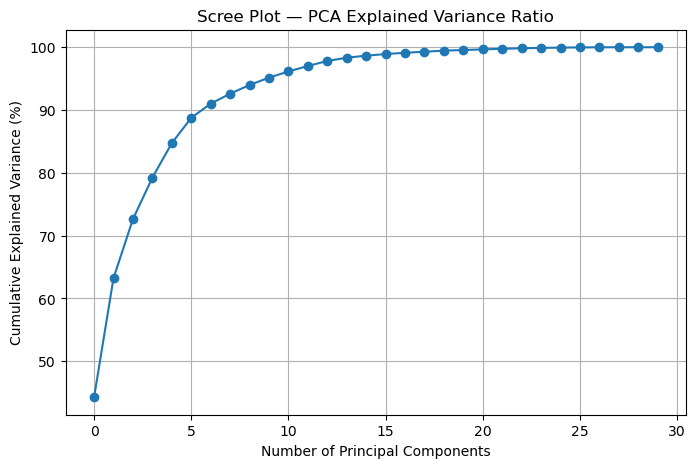


Number of components to retain 95% variance: 10

🔹 Accuracy Comparison (KNN with K=5)
Original Data Accuracy: 0.9708
PCA (95% variance) Data Accuracy: 0.9474


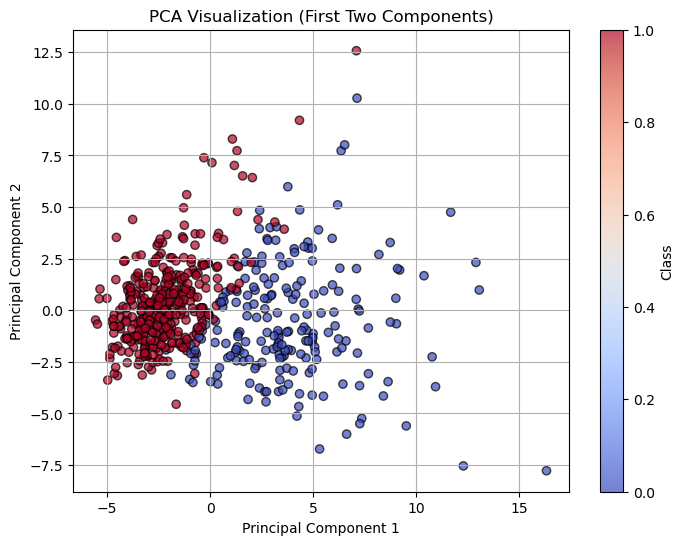

In [14]:
# ============================================
# 1. Import Required Libraries
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ============================================
# 2. Load Dataset
# ============================================
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

print("Dataset shape:", X.shape)
print("Number of classes:", len(np.unique(y)))

# ============================================
# 3. Standardize Data
# (PCA requires data to be standardized)
# ============================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================
# 4. Apply PCA and Analyze Variance
# ============================================
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot (explained variance ratio)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot — PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

# ============================================
# 5. Retain 95% Variance and Transform Dataset
# ============================================
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print(f"\nNumber of components to retain 95% variance: {pca_95.n_components_}")

# ============================================
# 6. Train/Test Split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_pca_train, X_pca_test, _, _ = train_test_split(
    X_pca_95, y, test_size=0.3, random_state=42, stratify=y
)

# ============================================
# 7. Train KNN on Original Data
# ============================================
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
y_pred_orig = knn_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# ============================================
# 8. Train KNN on PCA-Transformed Data
# ============================================
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

# ============================================
# 9. Compare Results
# ============================================
print("\n🔹 Accuracy Comparison (KNN with K=5)")
print(f"Original Data Accuracy: {acc_orig:.4f}")
print(f"PCA (95% variance) Data Accuracy: {acc_pca:.4f}")

# ============================================
# 10. Visualization — First Two Principal Components
# ============================================
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1],
            c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (First Two Components)')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

9.  KNN Regressor with Distance Metrics and K-Value Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
    a. Euclidean distance (K=5)
    b. Manhattan distance (K=5)
    c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

Training samples: 350
Testing samples: 150

🔹 KNN Regression (K=5)
Euclidean Distance MSE: 4960.8962
Manhattan Distance MSE: 5318.9501


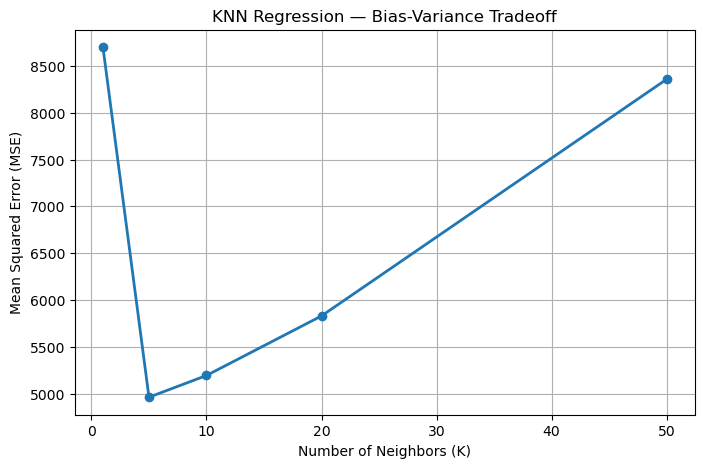

In [17]:
# ============================================
# 1. Import Required Libraries
# ============================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# ============================================
# 2. Generate Synthetic Regression Dataset
# ============================================
X, y = make_regression(
    n_samples=500,
    n_features=10,
    noise=15,
    random_state=42
)

# Split into train/test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# ============================================
# 3. KNN Regressor with Different Distance Metrics (K=5)
# ============================================
# a) Euclidean distance (metric='minkowski', p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# b) Manhattan distance (metric='minkowski', p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=1)
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("\n🔹 KNN Regression (K=5)")
print(f"Euclidean Distance MSE: {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE: {mse_manhattan:.4f}")

# ============================================
# 4. Analyze K vs. MSE (Bias–Variance Tradeoff)
# ============================================
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

# ============================================
# 5. Plot K vs. MSE
# ============================================
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_values, marker='o', linewidth=2)
plt.title("KNN Regression — Bias-Variance Tradeoff")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

10.  KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
   a. Brute-force method
   b. KD-Tree
   c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important features).

Dataset Shape: (768, 9)
Missing values before imputation:
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

✅ Missing values after imputation: 0

🔹 Method: brute
Accuracy: 0.7359
Training Time: 0.0016 sec

🔹 Method: kd_tree
Accuracy: 0.7359
Training Time: 0.0027 sec

🔹 Method: ball_tree
Accuracy: 0.7359
Training Time: 0.0041 sec

📊 Performance Comparison:

      Method  Accuracy  Training Time (s)
0      brute  0.735931           0.001565
1    kd_tree  0.735931           0.002692
2  ball_tree  0.735931           0.004090

🏆 Best Performing Method: brute


<Figure size 800x600 with 0 Axes>

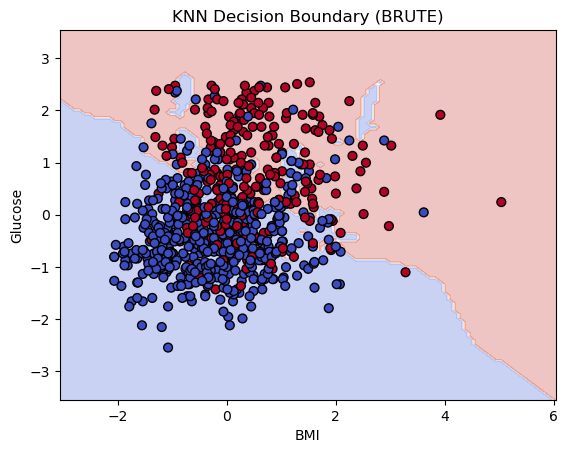

In [20]:
# ============================================
# 1. Import Required Libraries
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.feature_selection import mutual_info_classif

# ============================================
# 2. Load Pima Indians Diabetes Dataset
# ============================================
# You can load from URL or a local CSV if available
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv(url, names=columns)

print("Dataset Shape:", df.shape)
print("Missing values before imputation:\n", df.isin([0]).sum())

# Replace zeros (invalid entries) with NaN for specific features
features_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[features_with_missing] = df[features_with_missing].replace(0, np.nan)

# ============================================
# 3. KNN Imputation for Missing Values
# ============================================
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=columns)

print("\n✅ Missing values after imputation:", df_imputed.isna().sum().sum())

# ============================================
# 4. Split Data and Scale Features
# ============================================
X = df_imputed.drop("Outcome", axis=1)
y = df_imputed["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# ============================================
# 5. Train KNN Using Different Algorithms
# ============================================
methods = ['brute', 'kd_tree', 'ball_tree']
results = []

for method in methods:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    knn.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((method, acc, train_time))
    print(f"\n🔹 Method: {method}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training Time: {train_time:.4f} sec")

# ============================================
# 6. Compare Results
# ============================================
results_df = pd.DataFrame(results, columns=["Method", "Accuracy", "Training Time (s)"])
print("\n📊 Performance Comparison:\n")
print(results_df)

# ============================================
# 7. Visualize Decision Boundary (Best Method)
# ============================================
best_method = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Method"]
print(f"\n🏆 Best Performing Method: {best_method}")

# Find 2 most important features using mutual information
mi_scores = mutual_info_classif(X_scaled, y)
top2_indices = np.argsort(mi_scores)[-2:]

X2 = X_scaled[:, top2_indices]
feature_names = np.array(X.columns)[top2_indices]

# Train best KNN on 2D data
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_best.fit(X2, y)

# Plot decision boundary
plt.figure(figsize=(8,6))
display = DecisionBoundaryDisplay.from_estimator(
    knn_best, X2, response_method="predict",
    cmap='coolwarm', alpha=0.3
)
plt.scatter(X2[:, 0], X2[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f"KNN Decision Boundary ({best_method.upper()})")
plt.show()